##**OVERVIEW OF TOPIC MODELLING FOR NIGERIA CULTURAL HERITAGE**

Topic modeling for Nigeria's cultural heritage involves using computational techniques to analyze textual data related to Nigeria's diverse cultural elements, including ethnic groups, languages, traditions, art forms, and historical narratives. By applying methods such as Latent Dirichlet Allocation (LDA), researchers aim to identify latent topics and patterns within the corpus of cultural heritage documents. This approach enables the extraction of key themes, topics, and relationships, providing insights into the richness and complexity of Nigeria's cultural landscape. Through topic modeling, stakeholders can gain a deeper understanding of Nigeria's cultural heritage, facilitating knowledge dissemination, heritage preservation, tourism promotion, and cross-cultural appreciation. Moreover, topic modeling offers valuable insights for policymaking, resource allocation, and strategic planning aimed at safeguarding and promoting Nigeria's cultural diversity and legacy. The following steps were strictly to achieve this task: To implement topic modeling for Nigeria's cultural heritage, follow these steps:

**1	Data Collection:** Gather a diverse range of textual data related to Nigeria's cultural heritage, including historical documents, folklore, literature, interviews, and online content.

**2	Preprocessing:** Clean and preprocess the text data to remove noise, such as special characters, numbers, and stopwords. Tokenize the text into individual words or phrases and perform lemmatization or stemming to normalize the words.

**3	Document-Term Matrix:** Create a document-term matrix (DTM) or a bag-of-words representation to convert the preprocessed text data into a numerical format suitable for modeling. This matrix represents the frequency of terms in each document.

**4	Topic Modeling:** Apply a topic modeling algorithm such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) to identify latent topics within the text corpus. These algorithms cluster words into topics based on their co-occurrence patterns.

**5	Model Evaluation:** Evaluate the quality of the topic model using metrics such as coherence score, perplexity, or human judgment. Adjust the number of topics and other parameters to optimize the model's performance.

**6	Interpretation:** Interpret the topics generated by the model by examining the most representative words or documents for each topic. Assign meaningful labels to the topics based on their content and coherence.

**7	Visualization:** Visualize the results of the topic modeling process using interactive visualization tools such as pyLDAvis. This enables intuitive exploration and understanding of the relationships between topics and documents.

**8	Refinement and Iteration:** Refine the topic model based on feedback from domain experts or stakeholders. Iterate on the preprocessing, modelling, and evaluation steps to improve the quality and relevance of the topics identified.

**9	Application:** Apply the insights gained from topic modelling to various use cases, such as cultural preservation, tourism development, education, policy formulation, and community engagement. Use the topics to inform decision-making processes and develop targeted interventions for promoting Nigeria's cultural heritage.


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1yL5qEUqn9vdCoAq9RA7-ttKWFmGazVpt#scrollTo=oBUns1JjmIGs"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

** **
### LDA Implementation

1. [Loading data](#load_data)
2. [Read the datasets from the GitHub Repository](#Repo)
2. [Data cleaning](#clean_data)
3. [Exploratory analysis](#eda)
4. [Prepare data for LDA analysis](#data_preparation)
5. [LDA model training](#train_model)
6. [Analyzing LDA model results](#results)

** **
For this workshop, we’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

Let’s start by looking at the content of the file

** **
#### Step 1: Loading Data and installing the required libraries<a class="anchor\" id="load_data"></a>
** **

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Importing modules
import pandas as pd
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Step 2: Read the dataset automatically from the github repository<a class="anchor\" id="repo"></a>

In [ ]:
from io import BytesIO
from zipfile import ZipFile
import requests
import urllib.request
import re

import requests
import pandas as pd

# Fetch the contents of the directory
import requests
import pandas as pd

# Fetch the contents of the directory
repo_url = 'https://api.github.com/repos/Paulakinpelu/Nigeria-Cultural-Heritage-Topic-Modelling-using-BERTopic-LDA/contents/Nigeria_Cultural_Heritage_Datasets'
response = requests.get(repo_url)

# List to store contents
file_contents = []

if response.status_code == 200:
    contents = response.json()
    print("Contents of the folder:")
    for item in contents:
        if item['type'] == 'file' and item['name'].endswith('.txt'):
            # Extract the download URL for each text file
            download_url = item['download_url']

            # Download the text file
            text_response = requests.get(download_url)

            # Check if download was successful
            if text_response.status_code == 200:
                # Print the name of the text file
                print(f"\n{item['name']}:")

                # Print the contents of the text file
                print(text_response.text)

                # Append content to the list
                file_contents.append({'filename': item['name'], 'content': text_response.text})
            else:
                print(f"Failed to download {item['name']}. Status code:", text_response.status_code)
else:
    print("Failed to fetch contents. Status code:", response.status_code)

# Create DataFrame
papers = pd.DataFrame(file_contents)

# Display DataFrame
print(papers)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Contents of the folder:

Bini culture.txt:
The Binis, also called the Edo people,[25] are a people of the South South region of modern Nigeria; they are said to be around 3.8 million as of the 21st Century. They are ruled by monarchs, and are famous for their Benin Bronzes. In the pre-colonial period, they controlled a powerful empire.[26][27] They are an ethnic group that is primarily found in Edo State, and spread across the Delta, Ondo, and Rivers states of Nigeria in smaller concentrations. The language they speak is called the Edo language. The Bini people are closely related to several other ethnic groups that usually speak Edoid languages, for example the Esan, however it is important to address the fact that the name "Benin" (and "Bini") is a Portuguese corruption, which came from the word "Ubinu", which came into use during the reign of Oba Ewuare the Great, c. 1440. The word "Ubinu" was used to depict and portray the royal administrative centre or capital proper of the kingdo

Read data into papers, the file can be downloaded from github account

In [ ]:
# uncomment below if you have the csv file in your directory

# papers = pd.read_csv('papers.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# uncomment below if you have the xls file in your directory

# !pip install --upgrade xlrd
# papers = pd.read_excel('savedrecs.xls')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print head
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,filename,content
0,Bini culture.txt,"The Binis, also called the Edo people,[25] are..."
1,Hausa-Fulani culture.txt,The Hausa and Fulani ethnic groups are said to...
2,Idanre-Hill.txt,"The Idanre Hill, or Oke Idanre is located in I..."
3,Igbo culture.txt,"The Igbo people, commonly and often referred t..."
4,Ijaw culture.txt,The Ijaw people are said to be a collection of...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


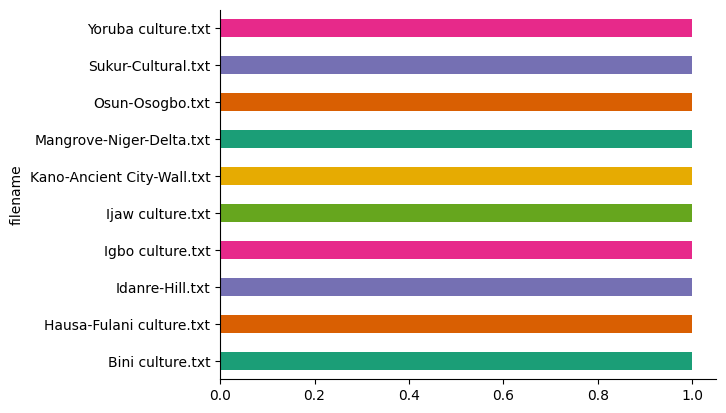

In [ ]:
# @title filename

from matplotlib import pyplot as plt
import seaborn as sns
papers.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
papers.describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,filename,content
count,10,10
unique,10,10
top,Bini culture.txt,"The Binis, also called the Edo people,[25] are..."
freq,1,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


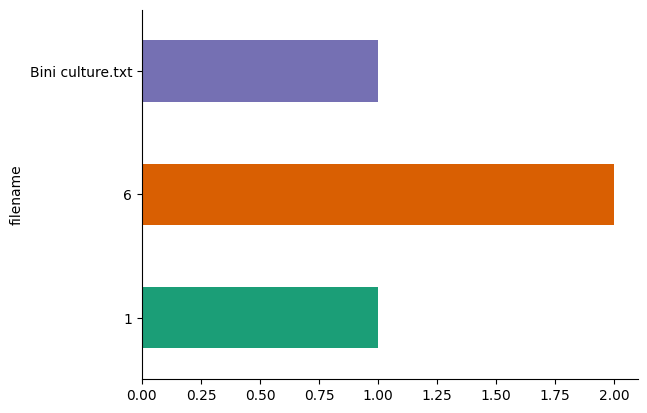

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

** **
#### Step 3: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we'll only look at 100 papers


After completion, try and sample more papers and look at the results


In [ ]:
papers.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 2)

##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of `paper_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

Example on re.sub -- uncomment and try different characters

** **
#### Step 4: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.



The join() method takes all items in an iterable and joins them into one string. A string must be specified as the separator. uncomment the below to see example

In [ ]:
import os
import requests
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess text data by removing special characters, converting to lowercase,
    and removing stopwords.

    Parameters:
    - text (str): Input text to be preprocessed.

    Returns:
    - preprocessed_text (str): Preprocessed text.
    """
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    return preprocessed_text
print(preprocess_text)


<function preprocess_text at 0x7bbb1c8420e0>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


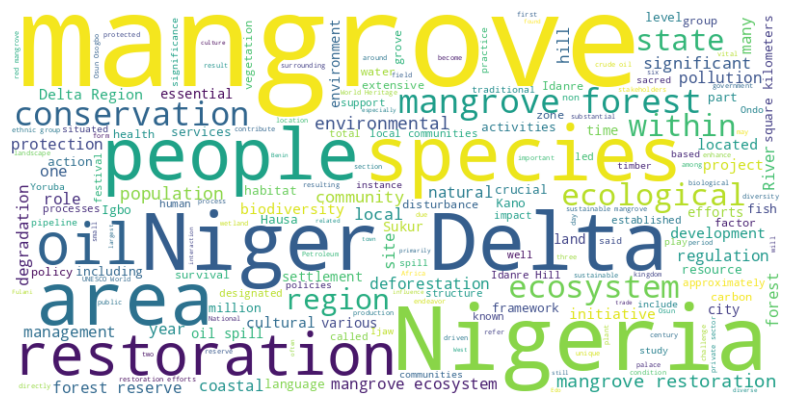

In [ ]:
# Import the wordcloud library
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List to store contents of text files
downloaded_texts = []

# Fetch and download text files
for item in contents:
    if item['type'] == 'file' and item['name'].endswith('.txt'):
        # Extract the download URL for each text file
        download_url = item['download_url']

        # Download the text file
        text_response = requests.get(download_url)

        # Check if download was successful
        if text_response.status_code == 200:
            # Append the text content to the list
            downloaded_texts.append(text_response.text)
        else:
            print(f"Failed to download {item['name']}. Status code:", text_response.status_code)

# Concatenate all text files into a single string
all_text = '\n'.join(downloaded_texts)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Visualize the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


** **
#### Step 5: Prepare text for LDA analysis <a class="anchor\" id="data_preparation"></a>
** **

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

Generate Similar (gensim):
What is Gensim? Gensim = “Generate Similar” is a popular open source natural language processing (NLP) library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning to perform various complex tasks such as − Building document or word vectors.

NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = papers['content'].values.tolist()

#data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:20])

['binis', 'also', 'called', 'edo', 'people', 'people', 'south', 'south', 'region', 'modern', 'nigeria', 'said', 'around', 'million', 'st', 'century', 'ruled', 'monarchs', 'famous', 'benin']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:20])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 3), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


** **
#### Step 6: LDA model tranining <a class="anchor\" id="train_model"></a>
** **

To keep things simple, we'll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [ ]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.020*"mangrove" + 0.007*"restoration" + 0.007*"oil" + 0.006*"delta" + '
  '0.006*"people" + 0.006*"mangroves" + 0.006*"niger" + 0.005*"nigeria" + '
  '0.005*"forest" + 0.005*"species"'),
 (1,
  '0.026*"mangrove" + 0.008*"oil" + 0.008*"nigeria" + 0.008*"restoration" + '
  '0.008*"mangroves" + 0.006*"delta" + 0.005*"forest" + 0.005*"niger" + '
  '0.005*"species" + 0.005*"conservation"'),
 (2,
  '0.021*"mangrove" + 0.009*"restoration" + 0.007*"mangroves" + '
  '0.007*"nigeria" + 0.006*"delta" + 0.006*"oil" + 0.006*"niger" + '
  '0.006*"species" + 0.005*"forest" + 0.005*"people"'),
 (3,
  '0.011*"mangrove" + 0.006*"nigeria" + 0.005*"people" + 0.005*"restoration" + '
  '0.004*"mangroves" + 0.004*"sukur" + 0.004*"oil" + 0.004*"delta" + '
  '0.003*"cultural" + 0.003*"region"'),
 (4,
  '0.013*"mangrove" + 0.006*"nigeria" + 0.006*"oil" + 0.006*"restoration" + '
  '0.006*"mangroves" + 0.006*"people" + 0.006*"niger" + 0.004*"delta" + '
  '0.004*"species" + 0.004*"idanre"')]


** **
#### Step 7: Analyzing our LDA model <a class="anchor\" id="results"></a>
** **

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [ ]:
!pip install bertopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def run_lda(texts):
    """
    Run LDA for topic modeling.

    Parameters:
    - texts (list): List of preprocessed text data.

    Returns:
    - lda_model (object): Trained LDA model.
    - corpus (list): List of term frequency lists.
    - dictionary (object): Gensim Dictionary object.
    """
    # Create a dictionary representation of the documents
    from gensim import corpora

    # Tokenize the text
    tokenized_documents = [word_tokenize(document.lower()) for document in texts]

    # Step 1: Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_documents)

    # Step 2: Filter out tokens that appear in less than 10 documents or more than 50% of the documents
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    # Step 3: Convert the preprocessed documents to a bag-of-words representation
    bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

    # Step 4: Print the dictionary and the bag-of-words representation of the first document
    print("Dictionary:")
    print(dictionary)
    print("\nBag-of-words representation of the first document:")
    print(bow_corpus[0])

    # Filter out words that occur less than 5 documents, or more than 50% of the documents
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Bag-of-words representation of the documents
    corpus = [dictionary.doc2bow(text) for text in tokenized_documents]

    print("Number of documents in corpus:", len(corpus))  # Debugging

    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

    return lda_model, corpus, dictionary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
import re
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess text data by removing special characters, converting to lowercase,
    and removing stopwords.

    Parameters:
    - text (str): Input text to be preprocessed.

    Returns:
    - preprocessed_text (list): List of preprocessed tokens.
    """
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    return words


def run_lda(documents):
    """
    Run LDA for topic modeling.

    Parameters:
    - documents (list): List of documents (strings).

    Returns:
    - lda_model (object): Trained LDA model.
    - bow_corpus (list): List of bag-of-words representations of documents.
    - dictionary (object): Gensim Dictionary object.
    """
    from gensim.models import LdaModel
    from gensim.corpora import Dictionary

    # Tokenize the documents
    tokenized_documents = [preprocess_text(doc) for doc in documents]

    # Create a dictionary representation of the documents
    dictionary = Dictionary(tokenized_documents)

    # Convert the preprocessed documents to a bag-of-words representation
    bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

    # Train LDA model
    lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=10, random_state=42)

    return lda_model, bow_corpus, dictionary


# Define dictionary with cultural keywords
data_dict = {
    'Bini_Culture': ["Edo people, Benin Kingdom, Benin City, Bini language, Bini traditional attire, Bini traditional festivals (such as Igue Festival), Bini traditional religion and beliefs, Benin bronze artifacts, Bini traditional music and dance, Bini art and craft"],
    'Hausa_Culture': ["Hausa, Fulani, Ethnic groups, Northern Nigeria, Population, Cultural similarity, Sokoto, Kano, Katsina, Market centers, Trans-Saharan caravan trade routes, City states, Conquest, Re-establishment, Kingdoms, Islam, Social life, Education, Dress, Taste, Islamic world, Monogamy, Sharo, Nomadic lifestyle, West Africa, Tolerance, Suppression, Merchants, Hawan Sallah festival, Sheikh Usman dan Fodio, Hausa-Fulani ethnic group, Hausa language, Fulani language, Hausa-Fulani traditional attire, Hausa-Fulani cuisine (including tuwo shinkafa, fura da nono), Hausa-Fulani music (such as Sakara music), Hausa-Fulani traditional architecture, Hausa-Fulani nomadic lifestyle, Hausa-Fulani traditional festivals and ceremonies, Hausa-Fulani cultural heritage sites"],
    'Yoruba_Culture': ["Yoruba people, Yoruba language, Yoruba traditional attire, Yoruba traditional religion and deities, Yoruba traditional marriage customs, Yoruba traditional festivals (such as New Yam Festival, Igbo Landing), Yoruba traditional music (such as Highlife, Ogene), Yoruba cuisine (such as Ofe nsala, Egusi soup, Fufu), Yoruba traditional architecture, Yoruba proverbs and folklore"],
    'Igbo_Culture': ["Igbo people, Igbo language, Igbo traditional attire (e.g., Isi Agu, George, Akwa Ocha), Igbo traditional religion and deities (e.g., Ala, Amadioha, Chukwu), Igbo traditional marriage customs, Igbo traditional festivals (e.g., New Yam Festival, Igbo Landing), Igbo traditional music (e.g., Highlife, Ogene), Igbo cuisine (e.g., Ofe nsala, Egusi soup, Fufu), Igbo traditional architecture (e.g., mud houses, compound houses), Igbo proverbs and folklore"],
    'Ijaw_Culture': ["Ijaw people, Ijaw language, Ijaw traditional attire (e.g., wrapper, buba), Ijaw traditional religion and beliefs, Ijaw traditional festivals (e.g., Iria Festival, Opu Okun), Ijaw traditional music and dance, Ijaw cuisine (e.g., Banga soup, plantain porridge), Ijaw traditional marriage customs, Ijaw traditional fishing and boat-making, Ijaw traditional storytelling and oral literature"]
}

# Convert dictionary to DataFrame
data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Description'])

# Call the run_lda function
lda_model, bow_corpus, dictionary = run_lda(data['Description'])

# Compute coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=bow_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Coherence Score: nan


In [ ]:
def run_lda(texts):
    """
    Run LDA for topic modeling.

    Parameters:
    - texts (list): List of preprocessed text data.

    Returns:
    - lda_model (object): Trained LDA model.
    - corpus (list): List of term frequency lists.
    - dictionary (object): Gensim Dictionary object.
    """
    # Create a dictionary representation of the documents
    from gensim import corpora

    # Tokenize the text
    tokenized_documents = [word_tokenize(document.lower()) for document in texts]

    # Step 1: Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_documents)

    # Step 2: Filter out tokens that appear in less than 10 documents or more than 50% of the documents
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    # Step 3: Convert the preprocessed documents to a bag-of-words representation
    bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

    # Step 4: Print the dictionary and the bag-of-words representation of the first document
    print("Dictionary:")
    print(dictionary)
    print("\nBag-of-words representation of the first document:")
    print(bow_corpus[0])

    # Filter out words that occur less than 5 documents, or more than 50% of the documents
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Bag-of-words representation of the documents
    corpus = [dictionary.doc2bow(text) for text in tokenized_documents]

    print("Number of documents in corpus:", len(corpus))  # Debugging

    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

    return lda_model, corpus, dictionary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def run_lda(texts):
    """
    Run LDA for topic modeling.

    Parameters:
    - texts (list): List of preprocessed text data.

    Returns:
    - lda_model (object): Trained LDA model.
    - corpus (list): List of term frequency lists.
    - dictionary (object): Gensim Dictionary object.
    """
    # Create a dictionary representation of the documents
    from gensim import corpora

    # Assuming you have a list of preprocessed documents named 'preprocessed_text'

    # Step 1: Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(preprocessed_text)

    # Step 2: Filter out tokens that appear in less than 10 documents or more than 50% of the documents
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    # Step 3: Convert the preprocessed documents to a bag-of-words representation
    bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_text]

    # Step 4: Print the dictionary and the bag-of-words representation of the first document
    print("Dictionary:")
    print(dictionary)
    print("\nBag-of-words representation of the first document:")
    print(bow_corpus[0])

    # Filter out words that occur less than 5 documents, or more than 50% of the documents
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Bag-of-words representation of the documents
    corpus = [dictionary.doc2bow(text.split()) for text in texts]

    print("Number of documents in corpus:", len(corpus))  # Debugging

    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

    return lda_model, corpus, dictionary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.5379001282580947


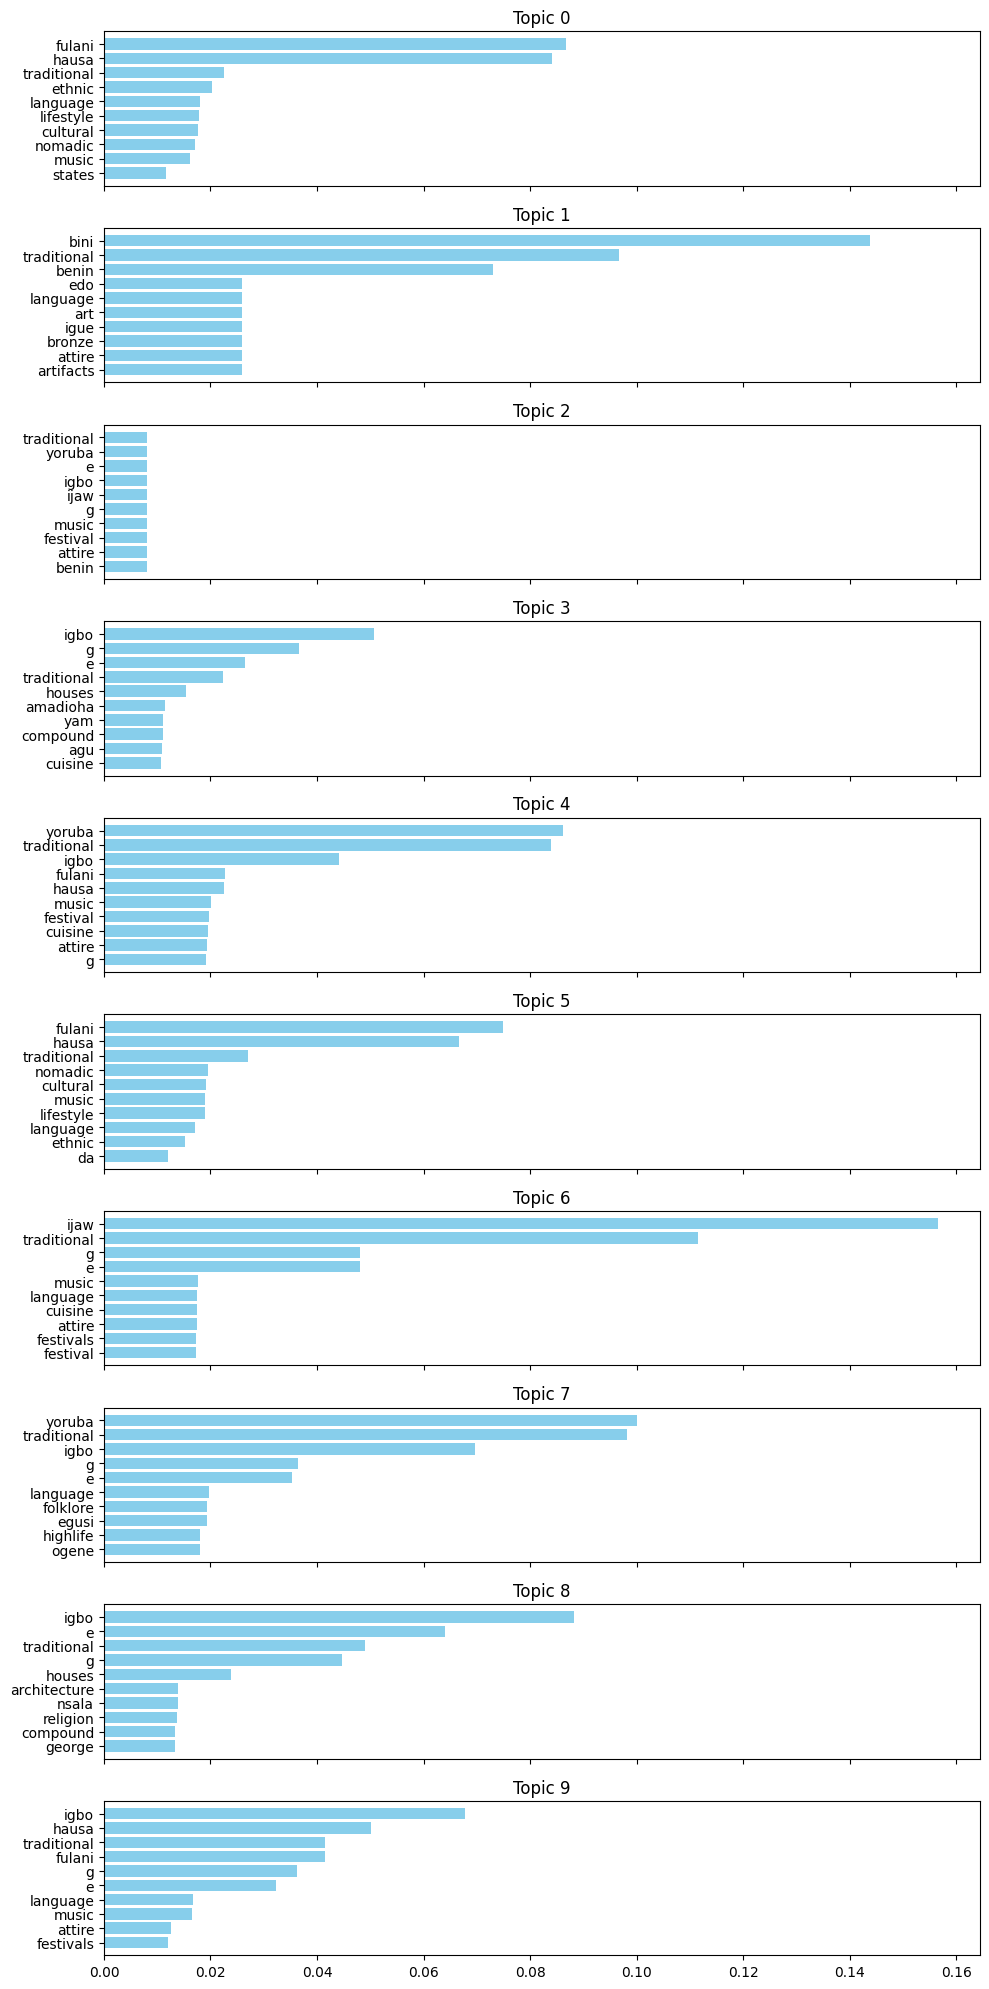

Index(['Bini_Culture', 'Hausa_Culture', 'Yoruba_Culture', 'Igbo_Culture',
       'Ijaw_Culture', 'tokens'],
      dtype='object')


In [ ]:
# Compute coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

# Visualize the topics
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(len(topics), 1, figsize=(10, len(topics) * 2), sharex=True)
for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    topic_words = dict(topic[1])
    ax.barh(list(topic_words.keys()), topic_words.values(), color="skyblue")
    ax.set_title(f'Topic {i}')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

data['tokens'] = data['Bini_Culture'].apply(preprocess_text) + data['Hausa_Culture'].apply(preprocess_text) + data['Yoruba_Culture'].apply(preprocess_text) + data['Igbo_Culture'].apply(preprocess_text) + data['Ijaw_Culture'].apply(preprocess_text)

print(data.columns)

In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.014928 -0.000069       1        1  71.468478
4      0.001805  0.006566       2        1   9.229278
2     -0.005342  0.000477       3        1   7.824960
0      0.002586 -0.007555       4        1   6.283113
3      0.015880  0.000580       5        1   5.194170, topic_info=             Term        Freq       Total Category  logprob  loglift
1673     mangrove  167.000000  167.000000  Default  30.0000  30.0000
2094  restoration   55.000000   55.000000  Default  29.0000  29.0000
48        nigeria   54.000000   54.000000  Default  28.0000  28.0000
1810          oil   54.000000   54.000000  Default  27.0000  27.0000
1674    mangroves   52.000000   52.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
357          many    0.631908   11.710565   Topic5  -6.3779   0.0381
90          areas    0.698582   18.662408   Topic5  -6.2776  -0.3276
977       coastal    0.726284   24.348173   Topic5  -6.2387  -0.5546
484        within    0.711031   24.562590   Topic5  -6.2600  -0.5846
291       forests    0.699581   28.249065   Topic5  -6.2762  -0.7407

[378 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2555      1  0.713533   adamawa
765       1  0.836193  adequate
2556      1  0.728890       age
3         1  0.656004      also
3         2  0.119273      also
...     ...       ...       ...
85        4  0.098449      year
85        5  0.098449      year
490       1  0.802416    yoruba
490       2  0.080242    yoruba
490       3  0.080242    yoruba

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

** **
#### CONCLUSION

In conclusion, the application of topic modeling techniques to Nigeria's cultural heritage offers profound insights into the multifaceted and dynamic nature of the country's rich cultural tapestry. Through the analysis of textual data, latent themes, patterns, and narratives emerge, shedding light on diverse aspects of Nigeria's cultural identity. The results of topic modeling provide valuable opportunities for exploration, interpretation, and preservation of Nigeria's cultural heritage.

By uncovering hidden connections and uncovering latent topics, researchers gain a deeper understanding of the linguistic, artistic, religious, culinary, and social dimensions of Nigeria's cultural landscape. These insights facilitate the documentation, promotion, and safeguarding of Nigeria's cultural heritage for future generations. Furthermore, the findings serve as a catalyst for interdisciplinary collaborations, community engagement, and policy interventions aimed at preserving and promoting Nigeria's diverse cultural heritage.

In essence, the utilization of topic modeling in the study of Nigeria's cultural heritage represents a significant advancement in our ability to unravel the complexities and nuances of this vibrant and diverse nation. By harnessing the power of data-driven approaches, we can celebrate, honor, and safeguard Nigeria's cultural legacy, ensuring its enduring relevance and vitality in an ever-changing world.


** **
#### References:
1. https://en.wikipedia.org/wiki/Culture_of_Nigeria
2. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
